In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-analysis/Time_series_analysis_and_forecast_DATASET.csv


In [108]:



# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


from statsmodels.tsa.stattools import adfuller    
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA


from datetime import datetime

In [109]:
df= pd.read_csv("/kaggle/input/time-series-analysis/Time_series_analysis_and_forecast_DATASET.csv")

In [110]:
df.head(20)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
5,2010-09-01 05:00:00,15.8,1232.000,3.69,19.160
6,2010-09-01 06:00:00,15.8,1282.930,3.69,23.540
7,2010-09-01 07:00:00,15.8,1430.935,3.69,26.235
8,2010-09-01 08:00:00,15.8,1670.275,3.69,28.690
9,2010-09-01 09:00:00,15.8,1815.155,3.69,29.630


In [111]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [112]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [113]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [114]:
# Create a DataFrame from the sample data
df = pd.DataFrame(df)

# Convert 'FullDate' column to datetime if not already done
df['FullDate'] = pd.to_datetime(df['FullDate'])

# Set 'FullDate' as the DataFrame index (required for resampling)
df.set_index('FullDate', inplace=True)

In [115]:
# Resample the data from hourly to daily and sum the values for each day
df = df.resample('D').sum()

print(df)

             Tmax      SysLoad  GasPrice  ElecPrice
FullDate                                           
2010-09-01  379.2  41565.38000   88.5600   2751.700
2010-09-02  369.6  38898.99000   88.5600    570.810
2010-09-03  439.2  41665.76000  106.8000    504.975
2010-09-04  328.8  35638.08500   81.3600    502.275
2010-09-05  357.6  35611.41000  106.8000    500.555
...           ...          ...       ...        ...
2021-02-24  537.6  -1525.49745  134.4000    634.770
2021-02-25  518.4   4539.07855  130.5048    577.515
2021-02-26  547.2   9517.02430  130.1808   1445.495
2021-02-27  564.0   4932.88015  130.0800    488.980
2021-02-28  583.2   6675.05485  131.6352    -98.985

[3834 rows x 4 columns]


Q11

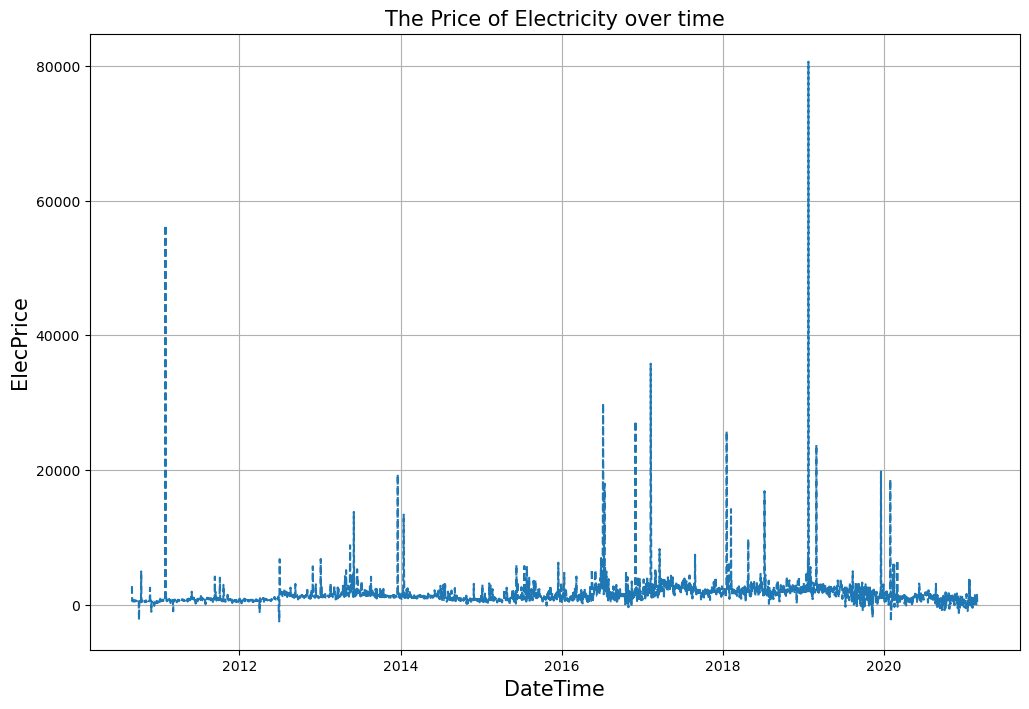

In [116]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df.ElecPrice, '--')
plt.grid()
plt.xlabel('DateTime', fontsize = 15)
plt.ylabel('ElecPrice', fontsize = 15)
plt.title('The Price of Electricity over time', fontsize = 15)
plt.show()


Q12

In [117]:
# Perform the ADF test on 'SysLoad' and 'GasPrice' columns
adf_result_sysload = adfuller(df['SysLoad'])
adf_result_gasprice = adfuller(df['GasPrice'])

# Extract the p-values from the ADF test results to 6 decimal places
p_value_sysload = round(adf_result_sysload[1], 6)
p_value_gasprice = round(adf_result_gasprice[1], 6)

print("P-value for SysLoad:", p_value_sysload)
print("P-value for GasPrice:", p_value_gasprice)

P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


Q13

In [118]:
# Perform the ADF test on 'GasPrice' and 'ElecPrice' columns
adf_result_gasprice = adfuller(df['GasPrice'])
adf_result_elecprice = adfuller(df['ElecPrice'])

# Extract the critical values, lag, and number of observations from the ADF test results to 4 decimal places
critical_values_gasprice = {key: round(value, 4) for key, value in adf_result_gasprice[4].items()}
critical_values_elecprice = {key: round(value, 4) for key, value in adf_result_elecprice[4].items()}

print("Critical Values for GasPrice:")
print(critical_values_gasprice)
print("Lag for GasPrice:", adf_result_gasprice[2])
print("Number of Observations for GasPrice:", adf_result_gasprice[3])

print("\nCritical Values for ElecPrice:")
print(critical_values_elecprice)
print("Lag for ElecPrice:", adf_result_elecprice[2])
print("Number of Observations for ElecPrice:", adf_result_elecprice[3])

Critical Values for GasPrice:
{'1%': -3.4321, '5%': -2.8623, '10%': -2.5672}
Lag for GasPrice: 27
Number of Observations for GasPrice: 3806

Critical Values for ElecPrice:
{'1%': -3.4321, '5%': -2.8623, '10%': -2.5672}
Lag for ElecPrice: 20
Number of Observations for ElecPrice: 3813


In [119]:
# reset index
df = df.reset_index()
df.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [120]:
# select columns for predictive model
df = df[['FullDate', 'ElecPrice']]

#rename columns to 'ds' and 'y' respectively
data = df.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

df.head()
data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [121]:
# Split data into train and test sets
train = data.iloc[:2757]
test = data.iloc[2757:]

print(train.shape)
print(test.shape)

(2757, 2)
(1077, 2)


In [122]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [123]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [124]:
from prophet import Prophet


In [125]:
# Initialize and train the Prophet model
model = Prophet()
model.fit(train[['ds', 'y']])

21:10:20 - cmdstanpy - INFO - Chain [1] start processing
21:10:21 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat
3829 2021-02-24  3446.060747
3830 2021-02-25  3512.928139
3831 2021-02-26  3279.749616
3832 2021-02-27  2936.426367
3833 2021-02-28  2848.375916


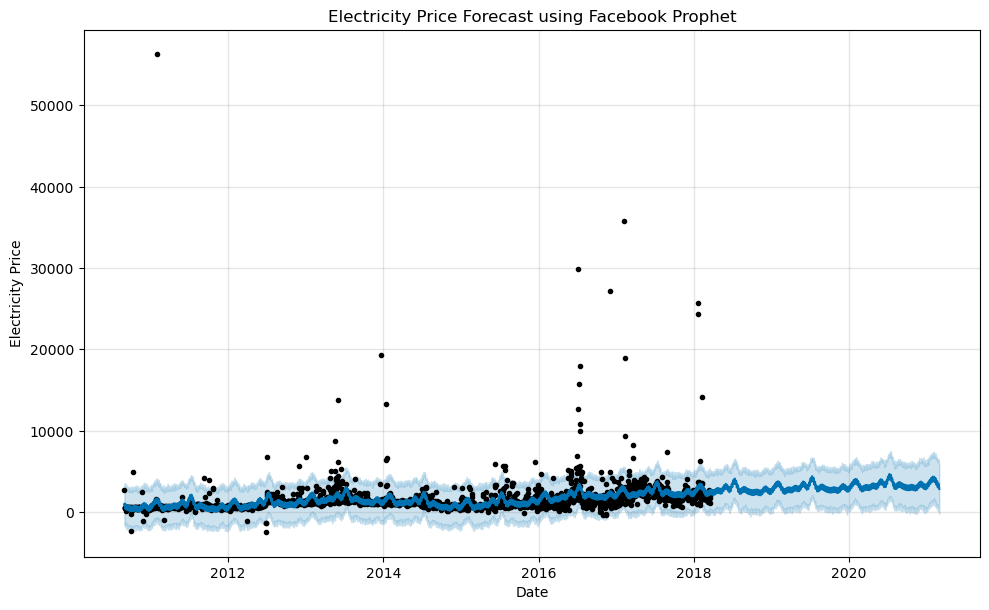

In [126]:

# Create future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_set))

# Perform predictions
forecast = model.predict(future_dates)

# Print the predicted values for 'ds' (FullDate) and 'yhat' (predicted ElecPrice)
print(forecast[['ds', 'yhat']].tail())

# Plot the forecasted values
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electricity Price')
plt.title('Electricity Price Forecast using Facebook Prophet')
plt.show()

In [127]:
from sklearn.metrics import mean_absolute_percentage_error

In [128]:
test_pred = test[['ds']]
prediction = model.predict(test_pred)

In [129]:
mape = mean_absolute_percentage_error(test.y, prediction.yhat) * 100
print("The MAPE is:", round(mape, 2))


The MAPE is: 544.73


In [130]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.y, prediction.yhat))
print("The MAPE is :", round(rms,2))
     

The MAPE is : 3208.06


plotting the components from the forecasted model, what month of the yearly seasonality has the highest value

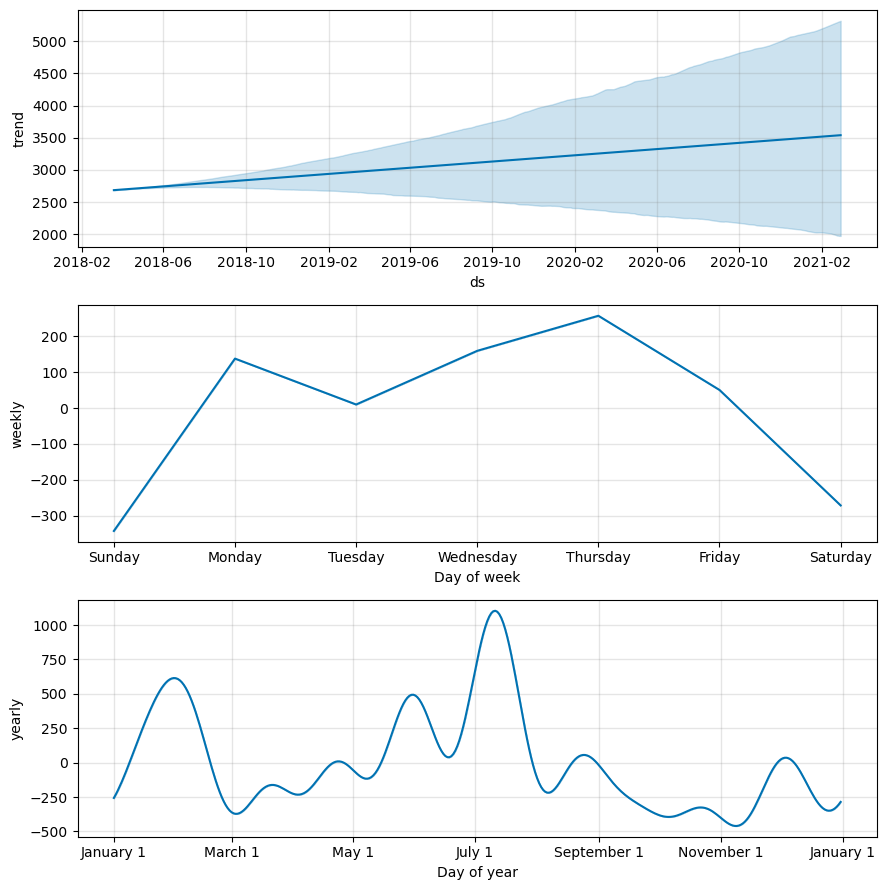

In [131]:
# Plot the components of the forecasted model
model.plot_components(prediction)
plt.show()

In [ ]:
df.reset_index(inplace=True)
df.shape

In [ ]:
df.reset_index(inplace=True)
df = df1
df1 = df1.rename(columns = {'FullDate':'ds',
                                    'ElecPrice':'y',
                                    'SysLoad':'add1',
                                     'Tmax':'add2',
                                    'GasPrice':'add3'})

In [ ]:
# Create a new DataFrame for Prophet with 'ds' and 'y' columns
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train['ElecPrice']

In [ ]:
# Split the data into train and test sets
train = df.iloc[:-2757]
test = df.iloc[-2757:]

# Create a new DataFrame for Prophet with 'ds' and 'y' columns
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train['ElecPrice']

# Add the regressors to the train_prophet DataFrame
train_prophet['add1'] = train['SysLoad']
train_prophet['add2'] = train['Tmax']
train_prophet['add3'] = train['GasPrice']

# Train the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(train_prophet)

# Create a new DataFrame for the test set with 'ds' and the regressor columns
test_prophet = pd.DataFrame()
test_prophet['ds'] = test.index
test_prophet['add1'] = test['SysLoad']
test_prophet['add2'] = test['Tmax']
test_prophet['add3'] = test['GasPrice']

# Make predictions for the test set
forecast = model.predict(test_prophet)

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('Multivariate Time Series Forecast with Facebook Prophet')
plt.show()